In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
sys.path.insert(1, "/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness/my_code/Bayesian-fairness/")

In [2]:
!pwd

/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness/my_code/Bayesian-fairness/src/notebooks/bayessian_fairness


In [1]:
exp_type = "discrete_new"
exp_name = "exp_compass"
exp_number = "test_2"
base_path = "/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness"
data_path = base_path + "/my_code/Bayesian-fairness/data"
exp_path = base_path + f"/my_code/Bayesian-fairness/results/bayesian_fairness/{exp_type}/{exp_name}/{exp_number}"

# load data


In [4]:
from src.discreate_new.utils.data_utils import get_discrete_compas_dataset

In [5]:
train_data, test_data, X_atr, Y_atr, Z_atr, n_x, n_y, n_z = get_discrete_compas_dataset(data_path=data_path)

# load policies

In [10]:
l_setting = 0.2
run = 9
step = 11

In [11]:
from src.discreate_new.tf.models.logistic_regression import LogisticRegressionTF

def load_policy(path):
    policy_weights = pd.read_csv(policy_path + "/final_w.csv").astype("float32")
    policy_bias = pd.read_csv(policy_path + "/final_b.csv").astype("float32")
    policy_weights_bias = [np.reshape(policy_weights["0"].values,(-1,1)),
                           policy_bias["0"].values[0]]
    #init policy
    policy_model = LogisticRegressionTF(input_dim=n_x)
    policy_model.set_weights(policy_weights_bias)
    return policy_model

In [12]:
policy_path = exp_path + f"/l_{l_setting}/run_{run}/marginal/opt_results/step_{step}"
marginal_policy_model = load_policy(policy_path)

policy_path = exp_path + f"/l_{l_setting}/run_{run}/bayes/opt_results/step_{step}"
bayes_policy_model = load_policy(policy_path)

policy_path = exp_path + f"/l_{l_setting}/run_{run}/bootstrap/opt_results/step_{step}"
bootstrap_policy_model = load_policy(policy_path)

# model

In [13]:
prior = 1/2
n_models = 16
utility_fun = np.eye(2)

In [14]:
from src.discreate_new.models.dirichlet_model import DirichletModel
from src.discreate_new.utils.model import get_delta

test_belief = DirichletModel(n_x=n_x, n_y=n_y, n_z=n_z, prior=prior)

In [15]:
test_belief.update_posterior_belief(data=test_data)

In [60]:
# test marginal model
test_marginal_model = test_belief.get_marginal_model()
test_marginal_delta = get_delta(test_marginal_model.Px_y, test_marginal_model.Px_yz,  test_marginal_model.Pz_y)
# sample model
test_models = []
test_deltas = []
test_Px_y = []
test_Px_yz = []
test_Pz_y = []
for _ in range(n_models):
    tmp_model = test_belief.sample_model()
    tmp_delta = get_delta(tmp_model.Px_y, tmp_model.Px_yz,  tmp_model.Pz_y)
    test_Px_y += [tmp_model.Px_y]
    test_Px_yz += [tmp_model.Px_yz]
    test_Pz_y += [tmp_model.Pz_y]
    test_models += [tmp_model]
    test_deltas += [tmp_delta]

In [61]:
np.array(test_Px_y).std(axis=0)

array([[0.0050256 , 0.00776027],
       [0.00777386, 0.00773879],
       [0.00692055, 0.00198704],
       [0.00435035, 0.00566575],
       [0.00157131, 0.00286099],
       [0.00373242, 0.0073563 ],
       [0.00132048, 0.00358351],
       [0.00305747, 0.00142863],
       [0.00139047, 0.0002894 ],
       [0.00098493, 0.00205902],
       [0.00101284, 0.00162383],
       [0.00138654, 0.00416291],
       [0.00075784, 0.00173561],
       [0.00036873, 0.00454161],
       [0.00083587, 0.00073335],
       [0.00057156, 0.00216163],
       [0.00099817, 0.0004914 ],
       [0.00091082, 0.00177933],
       [0.00045398, 0.00077041],
       [0.0005604 , 0.00151102],
       [0.00043667, 0.00039884],
       [0.00081854, 0.00290623],
       [0.00169232, 0.00459809],
       [0.00020269, 0.00078903],
       [0.00035201, 0.00108152],
       [0.00082652, 0.00020433],
       [0.00148339, 0.00146233],
       [0.00047685, 0.00041581],
       [0.00092534, 0.00198702],
       [0.00031176, 0.00191624],
       [0.

In [62]:
np.array(test_Px_y).std(axis=0)

array([[0.0050256 , 0.00776027],
       [0.00777386, 0.00773879],
       [0.00692055, 0.00198704],
       [0.00435035, 0.00566575],
       [0.00157131, 0.00286099],
       [0.00373242, 0.0073563 ],
       [0.00132048, 0.00358351],
       [0.00305747, 0.00142863],
       [0.00139047, 0.0002894 ],
       [0.00098493, 0.00205902],
       [0.00101284, 0.00162383],
       [0.00138654, 0.00416291],
       [0.00075784, 0.00173561],
       [0.00036873, 0.00454161],
       [0.00083587, 0.00073335],
       [0.00057156, 0.00216163],
       [0.00099817, 0.0004914 ],
       [0.00091082, 0.00177933],
       [0.00045398, 0.00077041],
       [0.0005604 , 0.00151102],
       [0.00043667, 0.00039884],
       [0.00081854, 0.00290623],
       [0.00169232, 0.00459809],
       [0.00020269, 0.00078903],
       [0.00035201, 0.00108152],
       [0.00082652, 0.00020433],
       [0.00148339, 0.00146233],
       [0.00047685, 0.00041581],
       [0.00092534, 0.00198702],
       [0.00031176, 0.00191624],
       [0.

In [63]:
np.array(test_Pz_y).std(axis=0)

array([[0.00506032, 0.00684188],
       [0.01394853, 0.0188578 ],
       [0.01834882, 0.01458135],
       [0.00798255, 0.00667699],
       [0.00503196, 0.00409456],
       [0.0035134 , 0.00469113],
       [0.00543343, 0.00581928],
       [0.0077394 , 0.01169588],
       [0.01330849, 0.01125942],
       [0.00438262, 0.0061104 ],
       [0.00365531, 0.00401992],
       [0.00264551, 0.0034492 ]])

# Evaluate

In [17]:
def get_utility_loss(utility_matrix, policy, Pxy):
    m = np.matmul(policy, Pxy)
    utility = np.sum(utility_matrix * m)
    return - utility

def get_fairness(policy, model_delta):
    expand_Pa_x = np.expand_dims(np.expand_dims(policy, axis=0), axis=0)
    expand_delta = np.expand_dims(model_delta, axis=-1)
    c =  np.matmul(expand_Pa_x,
                   expand_delta)
    fairness = np.sum(np.linalg.norm(c,axis = (2,3), ord=1))
    return fairness

In [18]:
def get_metrics(policy_model, model, model_delta, utility_fun, l ):
    x = np.eye(n_x)
    pred = policy_model.predict(x)
    p_a_x = np.squeeze(np.array([1-pred,
                                 pred]))
    
    neg_utility = get_utility_loss(utility_matrix=utility_fun,
                                   policy=p_a_x,
                                   Pxy=model.Pxy)
    
    fairness = get_fairness(policy= p_a_x, model_delta=model_delta)
    loss = - neg_utility - l * fairness
    return {
            "loss":loss,
            "fairness": fairness,
            "utility": -neg_utility
           }, p_a_x

In [19]:
def get_marginal_resutls(test_marginal_model,test_marginal_delta,marginal_policy_model,bayes_policy_model,bootstrap_policy_model):
    marginal_marginal_metrics, p_a_x1 = get_metrics(policy_model = marginal_policy_model,
                               model = test_marginal_model,
                               model_delta = test_marginal_delta,
                               utility_fun = utility_fun,
                               l=l_setting)
    marginal_marginal_metrics = pd.DataFrame([marginal_marginal_metrics])

    bayes_marginal_metrics, p_a_x2 = get_metrics(policy_model = bayes_policy_model,
                                   model = test_marginal_model,
                                   model_delta = test_marginal_delta,
                                   utility_fun = utility_fun,
                                   l=l_setting)
    bayes_marginal_metrics = pd.DataFrame([bayes_marginal_metrics])

    bootstrap_marginal_metrics, p_a_x3 = get_metrics(policy_model = bootstrap_policy_model,
                                    model = test_marginal_model,
                                    model_delta = test_marginal_delta,
                                    utility_fun = utility_fun,
                                    l=l_setting)
    bootstrap_marginal_metrics = pd.DataFrame([bootstrap_marginal_metrics])
    return  marginal_marginal_metrics, bayes_marginal_metrics, bootstrap_marginal_metrics
    

In [20]:
results = get_marginal_resutls(test_marginal_model,
                               test_marginal_delta,
                               marginal_policy_model,
                               bayes_policy_model,
                               bootstrap_policy_model)

marginal_marginal_metrics, bayes_marginal_metrics, bootstrap_marginal_metrics = results

5/5 [==============================] - 0s 464us/step


2023-02-10 13:02:24.360140: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [21]:
marginal_marginal_metrics

,loss,fairness,utility
0,0.587028,0.224432,0.631915


In [22]:
bootstrap_marginal_metrics

,loss,fairness,utility
0,0.587413,0.2237,0.632153


In [23]:
bayes_marginal_metrics

,loss,fairness,utility
0,0.587954,0.226513,0.633257


### evaluate based on test uncertainty

In [24]:
def get_baysian_metrics(test_models, test_deltas, marginal_policy_model, bootstrap_policy_model, bayes_policy_model):
    marginal_results = []
    bayes_results = []
    bootstrap_results = []
    for tmp_model, tmp_model_delta in zip(test_models,test_deltas):
        marginal_metrics, p_a_x1 = get_metrics(policy_model = marginal_policy_model,
                                   model = tmp_model,
                                   model_delta = tmp_model_delta,
                                   utility_fun = utility_fun,
                                   l=l_setting)
        marginal_results+= [marginal_metrics]

        bayes_metrics, p_a_x2 = get_metrics(policy_model = bayes_policy_model,
                                       model = tmp_model,
                                       model_delta = tmp_model_delta,
                                       utility_fun = utility_fun,
                                       l=l_setting)
        bayes_results+= [bayes_metrics]

        bootstrap_metrics, p_a_x3 = get_metrics(policy_model = bootstrap_policy_model,
                                        model = tmp_model,
                                        model_delta = tmp_model_delta,
                                        utility_fun = utility_fun,
                                        l=l_setting)
        bootstrap_results+= [bootstrap_metrics]
    marginal_results = pd.DataFrame(pd.DataFrame(marginal_results).mean()).T
    bootstrap_results = pd.DataFrame(pd.DataFrame(bootstrap_results).mean()).T
    bayes_results = pd.DataFrame(pd.DataFrame(bayes_results).mean()).T
    return marginal_results, bootstrap_results, bayes_results

In [25]:
bayesian_results =  get_baysian_metrics(test_models, 
                                        test_deltas, 
                                        marginal_policy_model, 
                                        bootstrap_policy_model, 
                                        bayes_policy_model)
marginal_results, bootstrap_results, bayes_results = bayesian_results

5/5 [==============================] - 0s 524us/step


In [26]:
marginal_results, bootstrap_results, bayes_results

(       loss  fairness   utility
 0  0.579825  0.253712  0.630567,
        loss  fairness   utility
 0  0.580167  0.252605  0.630688,
        loss  fairness   utility
 0  0.581043  0.254969  0.632037)

# results for every step

In [27]:
def run_results():

IndentationError: expected an indented block (1382606664.py, line 1)

In [28]:
marginal_marginal = []
marginal_boostrap = []
marginal_bayes = []

bayes_marginal = []
bayes_boostrap = []
bayes_bayes = []

total_steps = 11
for step in range(total_steps):
    policy_path = exp_path + f"/l_{l_setting}/run_{run}/marginal/opt_results/step_{step}"
    marginal_policy_model = load_policy(policy_path)

    policy_path = exp_path + f"/l_{l_setting}/run_{run}/bayes/opt_results/step_{step}"
    bayes_policy_model = load_policy(policy_path)

    policy_path = exp_path + f"/l_{l_setting}/run_{run}/bootstrap/opt_results/step_{step}"
    bootstrap_policy_model = load_policy(policy_path)
    
    step_results = get_marginal_resutls(test_marginal_model,
                                        test_marginal_delta,
                                        marginal_policy_model,
                                        bayes_policy_model,
                                        bootstrap_policy_model)

    step_marginal_marginal_metrics, step_marginal_bayes_marginal_metrics, step_marginal_bootstrap_marginal_metrics = step_results
    marginal_marginal += [step_marginal_marginal_metrics]
    marginal_boostrap += [step_marginal_bootstrap_marginal_metrics]
    marginal_bayes += [step_marginal_bayes_marginal_metrics]
    
    step_bayesian_results =  get_baysian_metrics(test_models, 
                                        test_deltas, 
                                        marginal_policy_model, 
                                        bootstrap_policy_model, 
                                        bayes_policy_model)
    step_bayes_marginal_results, step_bayes_bootstrap_results, step_bayes_bayes_results = step_bayesian_results
    bayes_marginal += [step_bayes_marginal_results]
    bayes_boostrap += [step_bayes_bootstrap_results]
    bayes_bayes += [step_bayes_bayes_results]

5/5 [==============================] - 0s 456us/step


5/5 [==============================] - 0s 526us/step


5/5 [==============================] - 0s 454us/step


5/5 [==============================] - 0s 456us/step


In [29]:
marginal_marginal = pd.concat(marginal_marginal,ignore_index=True)
marginal_boostrap = pd.concat(marginal_boostrap,ignore_index=True)
marginal_bayes = pd.concat(marginal_bayes,ignore_index=True)

bayes_marginal = pd.concat(bayes_marginal,ignore_index=True)
bayes_boostrap = pd.concat(bayes_boostrap,ignore_index=True)
bayes_bayes = pd.concat(bayes_bayes,ignore_index=True)

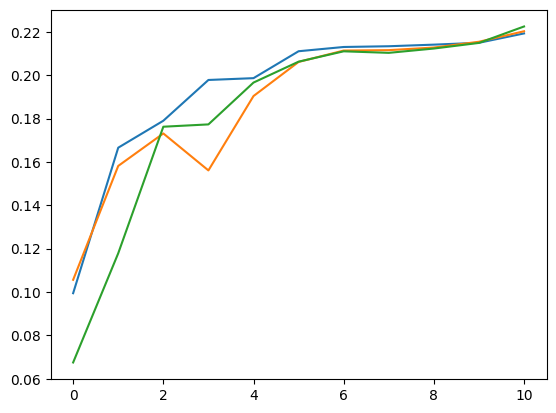

In [30]:
plt.figure()
plt.plot(marginal_marginal["fairness"], label = "marginal")
plt.plot(marginal_boostrap["fairness"], label = "boostrap")
plt.plot(marginal_bayes["fairness"], label = "bayes")
plt.show()
plt.close()

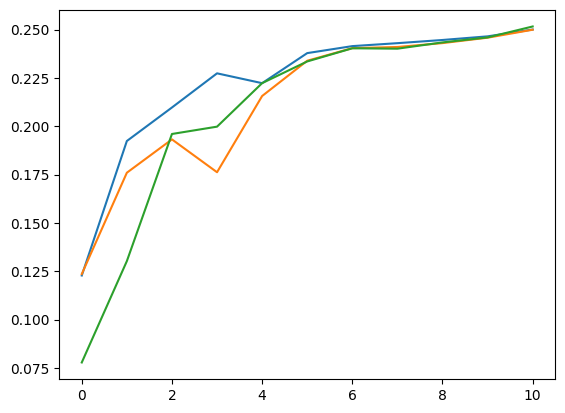

In [31]:
plt.figure()
plt.plot(bayes_marginal["fairness"], label = "marginal")
plt.plot(bayes_boostrap["fairness"], label = "boostrap")
plt.plot(bayes_bayes["fairness"], label = "bayes")
plt.show()
plt.close()

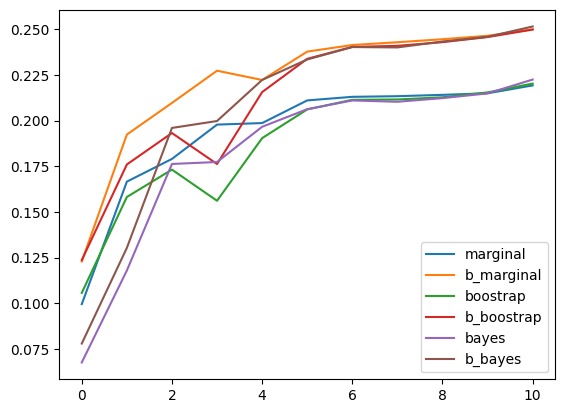

In [32]:
plt.figure()
plt.plot(marginal_marginal["fairness"], label = "marginal")
plt.plot(bayes_marginal["fairness"], label = "b_marginal")

plt.plot(marginal_boostrap["fairness"], label = "boostrap")
plt.plot(bayes_boostrap["fairness"], label = "b_boostrap")

plt.plot(marginal_bayes["fairness"], label = "bayes")
plt.plot(bayes_bayes["fairness"], label = "b_bayes")
plt.legend()
plt.show()
plt.close()

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [26]:
0.000077/0.000020

3.8499999999999996

In [27]:
5.928731597133702e-05/1.668814973756144e-05

3.552659635950773

In [22]:
bootstrap_results.mean(), bootstrap_marginal_metrics

(loss        0.541039
 fairness    0.000020
 utility     0.541059
 dtype: float64,
 {'loss': 0.5412525514558217,
  'fairness': 1.668814973756144e-05,
  'utility': 0.5412692396055593})

In [23]:
bayes_results.mean(), bayes_marginal_metrics

(loss        0.541046
 fairness    0.000007
 utility     0.541053
 dtype: float64,
 {'loss': 0.5412573309229451,
  'fairness': 5.690814777554183e-06,
  'utility': 0.5412630217377227})

In [80]:
bayes_metrics = get_metrics(policy_model = bayes_policy_model,
                               model = test_marginal_model,
                               model_delta = test_marginal_delta,
                               utility_fun = utility_fun,
                               l=l_setting)

5/5 [==============================] - 0s 579us/step


In [81]:
bootstrap_metrics = get_metrics(policy_model = bootstrap_policy_model,
                                model = test_marginal_model,
                                model_delta = test_marginal_delta,
                                utility_fun = utility_fun,
                                l=l_setting)

5/5 [==============================] - 0s 707us/step


In [68]:
x = np.eye(n_x)
pred = marginal_policy_model.predict(x)
p_a_x = np.squeeze(np.array([1-pred,pred]))

5/5 [==============================] - 0s 715us/step


In [66]:
get_fairness(policy, model_delta)

0.050827412651835935

In [69]:
neg_utility = get_utility_loss(utility_matrix=utility_fun,
                               policy=p_a_x,
                               Pxy=test_marginal_model.Pxy)

In [22]:
np.sum(p_a_x,0)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

# debug

In [64]:
policy = p_a_x
model_delta = test_marginal_delta

expand_Pa_x = np.expand_dims(np.expand_dims(policy, axis=0), axis=0)
expand_delta = np.expand_dims(model_delta, axis=-1)
c =  np.matmul(expand_Pa_x,
               expand_delta)
fairness = np.sum(np.linalg.norm(c,axis = (2,3), ord=1))
fairness

0.050827412651835935

#### policy

In [18]:
def get_random_policy(size):
    a = np.ones(shape=size[0])
    policy = np.random.dirichlet(a, size= size[1])
    return np.transpose(policy)

def get_random_policy_2(size):
    policy = np.random.random(size = size)
    return policy

In [19]:
policy = get_random_policy(size = (2,2))

In [20]:
def normilize_policy(policy):
    policy[policy < 0] = 0
    policy[policy > 1] = 1
    for x in range(policy.shape[-1]):
        policy[:, x] /= np.sum(policy[:, x])
    return policy

#### delta

In [21]:
def get_delta(Px_y, Px_yz):
    delta = np.zeros(Px_yz.shape)
    for z in range(Px_yz.shape[-1]):
        delta[:, :, z] = Px_y - Px_yz[:,:,z]
    return delta

def get_delta(Px_y, Px_yz, Pz_y):
    delta = np.zeros(Px_yz.shape)
    for z in range(Px_yz.shape[-1]):
        delta[:, :, z] = (Px_y - Px_yz[:,:,z]) * Pz_y[z,:]
    return delta

In [22]:
# d_1 = get_delta(true_dirichlet_model.Px_y, true_dirichlet_model.Px_yz)

In [23]:
# d_1

In [24]:
# d_2 = get_delta2(true_dirichlet_model.Px_y, true_dirichlet_model.Px_yz, true_dirichlet_model.Pz_y)

In [25]:
# d_2

#### utility

In [26]:
def get_eye_utility(size):
    return np.eye(size)

# Algorithm

### 1. set parameters

In [27]:
# --- data parameters
horizon = train_data.shape[0]

num_X = n_x # number of features
num_Y = n_y # number of outcomes
num_Z = n_z # number of sensitive features
num_A = 2 # number of actions

# --- SGD parameters
n_iter = 400 # number of itteration for SGD
lr = 1.0 # learning rate

# --- Algorithm parameters
update_policy_period = 100 # period to update policy
l = 0.5 # lambda
n_samples = 16 # number of sample for bayssian policy

# --- Utility
utility = get_eye_utility(size=num_A)

### 2. initializition

In [28]:
# initialize belief
belief = DirichletModel(n_x = num_X, n_y=num_Y, n_z=num_Z, prior = 0.5)

# initialize policy
policy = get_random_policy(size = (num_A, num_X))

In [29]:
# get true model delta to avoid computations
true_model_delta = get_delta(true_dirichlet_model.Px_y,
                             true_dirichlet_model.Px_yz,
                             true_dirichlet_model.Pz_y)

### 3.  main loop

#### fairness functions

In [30]:
def get_fairness(policy, model_delta):
    (X, Y, Z) = model_delta.shape
    fairness = 0
    for y in range(Y):
        for z in range(Z):
            delta = np.matmul(policy, model_delta[:, y , z ])
            fairness += np.linalg.norm(delta, 1)
    return fairness

In [31]:
def get_fairness_gradient(policy, model_delta):
    """
    Todo: vectorize operation
    """
    fairness_gradient = np.zeros(policy.shape)
    
    (X, Y, Z) = model_delta.shape
    for y in range(Y):
        for z in range(Z):
            dyz = model_delta[:,y,z].reshape((-1,1))
            c = np.matmul(policy, dyz)
            fairness_gradient -= np.matmul(c, dyz.T)
    
    return fairness_gradient

#### utility functions

In [32]:
def get_utility(policy, model, utility):
    """
    Calculate expected utility
    Todo: vectorize operation - minor
    """
    A, X = policy.shape
    Y = A
    Eu = 0
    for x in range(X):
        for y in range(Y):
            for a in range(A):
                Eu += utility[a,y] * policy[a,x] * model.Pxy[x,y]
                
    return Eu

In [33]:
def get_utility_gradient(policy, model, utility):
    """
    Todo: vectorize operation
    """
    utility_gradient = np.matmul(utility, model.Pxy.T )
    
    
    return utility_gradient

#### gradient fun

In [34]:
def project_gradient(grad):
    proj_grad = grad - np.mean(grad,axis=0)
    return proj_grad

#### opt functions

In [35]:
def evaluate(true_model, true_model_delta, policy, utility, l):
    """
    Evaluate policy on true model
    """
    results = {}
    results["fairness"] = np.round(get_fairness(policy, true_model_delta),4)
    results["utility"] = get_utility(policy, true_model, utility)
    results["total"] = (1 - l) * results["utility"] - l * results["fairness"]
    return results

In [36]:
def update_policy(policy, model, utility, l, lr, n_iter):
    """
    Marginal Policy Dirichlet
    """
    model.get_marginal_model()
    model_delta = get_delta(model.Px_y, model.Px_yz, model.Pz_y)
    
    for i in range(n_iter):
        fairness_gradient = get_fairness_gradient(policy, model_delta)
        utility_gradient = get_utility_gradient(policy, model, utility)
        gradient = (1 - l) * utility_gradient + l * fairness_gradient # minus on the gradient calc.
        gradient = project_gradient(gradient)
        policy = policy + lr * gradient # maximize Utility & minimize fairness constrain.
        policy = normilize_policy(policy)
    
    return policy

In [52]:
# reproduce results
stop

NameError: name 'stop' is not defined

In [53]:
def load_org_policy(org_path_results):
    file = pd.read_csv(org_path_results + "/policy.csv")
    p_1 = file.iloc[4].values
    p_2 = file.iloc[5].values
    p_1 = [float(x) for x in p_1[0].split(" ")[1:]]
    p_2 = [float(x) for x in p_2[0].split(" ")[1:]]
    return np.array([p_1, p_2])
# [float(x) for x in p_1[0].split(" ")[1:]]

In [54]:
org_path_results = "/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness/org_code/bayesian-fairness/src/octave"
policy = load_org_policy(org_path_results)
policy.shape

(2, 141)

In [55]:
l = 0.9

In [56]:
steps = horizon // update_policy_period

results = []
for step in range(steps):    
    # update policy step
    policy = update_policy(policy, belief, utility, l, lr, n_iter) # SDG to update policy
    
    # evaluation step
    step_results = evaluate(true_dirichlet_model, true_model_delta, policy, utility, l)
    results += [step_results]
    
    # update belief step
    data_start_index = step * update_policy_period
    data_stop_index = min(data_start_index + update_policy_period, horizon)
    belief.update_posterior_belief(train_data.iloc[data_start_index : data_stop_index])
    
    print(f"--- Step : {data_start_index + 1} \n  ------- {step_results}")
    

--- Step : 1 
  ------- {'fairness': 0.1363, 'utility': 0.5650138598478441, 'total': -0.0661686140152156}
--- Step : 101 
  ------- {'fairness': 0.2254, 'utility': 0.6068819276375023, 'total': -0.14217180723624978}
--- Step : 201 
  ------- {'fairness': 0.2441, 'utility': 0.621656288469007, 'total': -0.15752437115309934}
--- Step : 301 
  ------- {'fairness': 0.237, 'utility': 0.6282174714982683, 'total': -0.1504782528501732}
--- Step : 401 
  ------- {'fairness': 0.2311, 'utility': 0.6317311497537531, 'total': -0.1448168850246247}
--- Step : 501 
  ------- {'fairness': 0.2294, 'utility': 0.6328487039216448, 'total': -0.14317512960783552}
--- Step : 601 
  ------- {'fairness': 0.2274, 'utility': 0.6331077483098082, 'total': -0.1413492251690192}
--- Step : 701 
  ------- {'fairness': 0.2255, 'utility': 0.6333730935359196, 'total': -0.13961269064640808}
--- Step : 801 
  ------- {'fairness': 0.2252, 'utility': 0.6336972200556763, 'total': -0.1393102779944324}
--- Step : 901 
  ------- {'

In [57]:
np.log(0.6)

-0.5108256237659907

In [58]:
np.log(0.2)

-1.6094379124341003

In [41]:
evaluate(true_dirichlet_model, d_2, policy, utility, l)

NameError: name 'd_2' is not defined

In [ ]:
train_data.iloc[data_start_index : data_stop_index]

In [ ]:
pd_resutls = pd.DataFrame(results)

# plots

In [ ]:
pd_resutls[["utility"]].plot()

In [ ]:
# load org resutls
org = np.loadtxt(org_path_results + "/results.csv")
org = org[:,1][1:].reshape((4,-1))

org_pd = pd.DataFrame( columns= ["utility","fairness","total"])
org_pd["utility"] = org[0]
org_pd["fairness"] = org[2]
org_pd["total"] = org[1]

In [ ]:
org_pd["utility"].plot()
pd_resutls["utility"].plot()

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(org_pd["utility"], label = "original code results")
plt.plot(pd_resutls["utility"], label = "new code results")
plt.title("Utility")
plt.legend()
plt.show()

plt.figure()
plt.plot(org_pd["fairness"], label = "original code results")
plt.plot(pd_resutls["fairness"], label = "new code results")
plt.title("Fairness")
plt.legend()
plt.show()


In [ ]:
org_pd["fairness"].plot()
pd_resutls["fairness"].plot()

# Questions

In [ ]:
1. ProjectPolicyGradient ???